In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Definindo estilo
sns.set_style("darkgrid")

# Importando dados
dados = pd.read_csv('dados/ENEM_2018.csv', sep = ';', encoding = 'cp1252')

## Verificando dados

In [3]:
dados.shape

(5513747, 137)

In [4]:
dados.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
CO_UF_RESIDENCIA            int64
                            ...  
Q023                       object
Q024                       object
Q025                       object
Q026                       object
Q027                       object
Length: 137, dtype: object

In [5]:
dados.head(15)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A
5,180007239581,2018,2507507,João Pessoa,25,PB,23.0,F,0.0,1,...,A,B,A,A,B,A,B,B,A,A
6,180007198225,2018,3171709,Virgínia,31,MG,35.0,F,0.0,1,...,A,C,A,A,B,A,B,B,A,A
7,180008090447,2018,2207702,Parnaíba,22,PI,39.0,M,1.0,3,...,A,C,B,A,B,A,B,B,A,A
8,180008257068,2018,2304400,Fortaleza,23,CE,19.0,M,0.0,3,...,A,B,B,A,B,A,A,A,B,A
9,180008202044,2018,5103403,Cuiabá,51,MT,25.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A


## Amostra
Como podemos ver nosso dataset tem mais de 5 milhões de linhas e 137 colunas, nosso objetivo é trabalhar com um amostra. 

Criaremos uma amostra aleatória simples, onde os elementos têm a mesma probabilidade de serem selecionados para a amostra.

In [4]:
# Criando amostra aleatória simples
amostra = dados.sample(n = 3000)
amostra.shape

(3000, 137)

## Tratando os Dados

In [5]:
# Realizando saneamento dos dados, primeiro iremos excluir as colunas que não teram valor para nossa análise
amostra = amostra.drop([
    'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'TP_LOCALIZACAO_ESC',
    'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO',
    'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
    'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE',
    'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO',
    'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
    'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
    'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
    'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO',
    'IN_NOME_SOCIAL', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
    'Q003', 'Q004', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023'
], axis = 1)

In [6]:
# Tratando variáveis qualitativas
amostra['Q025'] = amostra['Q025'].map({'A':'Não', 'B':'Sim'})
amostra['TP_SEXO'] = amostra['TP_SEXO'].map({'F':'Feminino', 'M':'Masculino'})
amostra['TP_COR_RACA'] = amostra['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})
amostra['Q027'] = amostra['Q027'].map({'A':'Publica', 'B':'Pub e Pri', 'C':'Pub e Pri', 'D':'Privada', 'E':'Publica', 'F':'Nao Frequentou Escola'})
amostra['Q006'] = amostra['Q006'].map({
    'A':'0', 'B':'954', 'C':'1431', 'D':'1908', 'E':'2385', 'F':'2862', 'G':'3816', 'H':'4770', 'I':'5724',
    'J':'6678', 'K':'7632', 'L':'8586', 'M':'9540', 'N':'11448', 'O':'14310', 'P':'19080', 'Q':'19081'
})

In [9]:
# Vamos retirar de nossa amostra aquele que declararam que não frequentaram escola.
amostra.Q027.value_counts()

Publica                  2361
Privada                   347
Pub e Pri                 291
Nao Frequentou Escola       1
Name: Q027, dtype: int64

In [7]:
amostra = amostra.loc[amostra.Q027 != 'Nao Frequentou Escola']

## Análise das Variáveis qualitativas

In [11]:
# Análisando sexo.
# Vamos realizar uma pequena checagem na variável sexo TP_SEXO de nosso dados em relação a amostra.
dados.TP_SEXO.value_counts()

F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

In [12]:
dados.TP_SEXO.value_counts() / dados.shape[0]

F    0.590833
M    0.409167
Name: TP_SEXO, dtype: float64

In [13]:
amostra.TP_SEXO.value_counts()

Feminino     1773
Masculino    1226
Name: TP_SEXO, dtype: int64

In [14]:
amostra.TP_SEXO.value_counts() / amostra.shape[0]

Feminino     0.591197
Masculino    0.408803
Name: TP_SEXO, dtype: float64

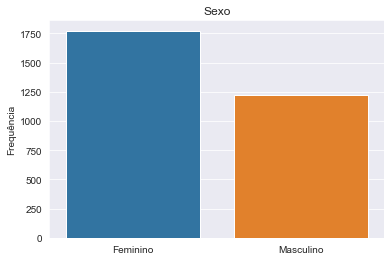

In [15]:
sns.countplot(amostra.TP_SEXO).set_title("Sexo")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

In [16]:
# Análisando cor da pele
amostra.TP_COR_RACA.value_counts()

Parda       1370
Branca      1096
Preta        376
Amarela       73
NA            68
Indígena      16
Name: TP_COR_RACA, dtype: int64

In [17]:
amostra.TP_COR_RACA.value_counts() / amostra.shape[0]

Parda       0.456819
Branca      0.365455
Preta       0.125375
Amarela     0.024341
NA          0.022674
Indígena    0.005335
Name: TP_COR_RACA, dtype: float64

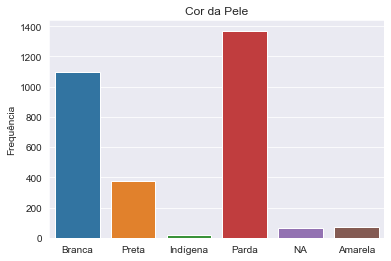

In [18]:
sns.countplot(amostra.TP_COR_RACA).set_title("Cor da Pele")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

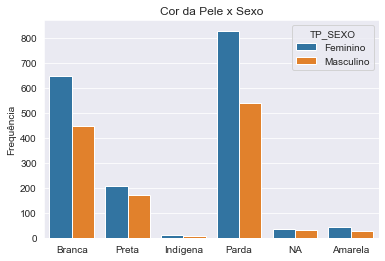

In [19]:
# Análisando cor da pele x sexo
sns.countplot(amostra.TP_COR_RACA, hue = amostra.TP_SEXO).set_title("Cor da Pele x Sexo")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

In [20]:
# Análisando UF
amostra.SG_UF_RESIDENCIA.value_counts()

SP    543
MG    305
RJ    212
BA    200
CE    197
PE    172
PA    170
RS    135
MA    123
PR    114
GO     91
PB     79
SC     72
RN     70
DF     66
AM     56
PI     55
MT     51
AL     49
ES     48
SE     47
MS     41
RO     37
TO     23
AP     20
AC     16
RR      7
Name: SG_UF_RESIDENCIA, dtype: int64

In [21]:
amostra.SG_UF_RESIDENCIA.value_counts() / amostra.shape[0]

SP    0.181060
MG    0.101701
RJ    0.070690
BA    0.066689
CE    0.065689
PE    0.057352
PA    0.056686
RS    0.045015
MA    0.041014
PR    0.038013
GO    0.030343
PB    0.026342
SC    0.024008
RN    0.023341
DF    0.022007
AM    0.018673
PI    0.018339
MT    0.017006
AL    0.016339
ES    0.016005
SE    0.015672
MS    0.013671
RO    0.012337
TO    0.007669
AP    0.006669
AC    0.005335
RR    0.002334
Name: SG_UF_RESIDENCIA, dtype: float64

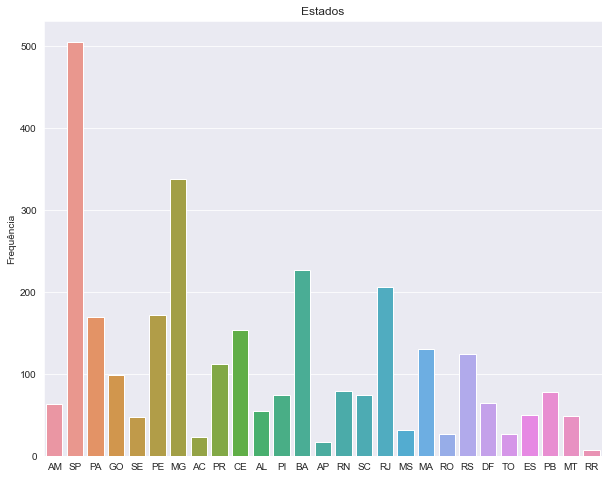

In [14]:
plt.figure(figsize = (10, 8))
sns.countplot(amostra.SG_UF_RESIDENCIA).set_title("Estados")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

In [23]:
# Análisando tipo de escolas
amostra.Q027.value_counts()

Publica      2361
Privada       347
Pub e Pri     291
Name: Q027, dtype: int64

In [24]:
amostra.Q027.value_counts() / amostra.shape[0]

Publica      0.787262
Privada      0.115705
Pub e Pri    0.097032
Name: Q027, dtype: float64

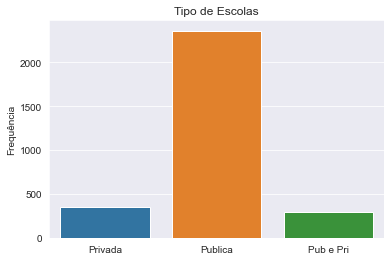

In [25]:
sns.countplot(amostra.Q027).set_title("Tipo de Escolas")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

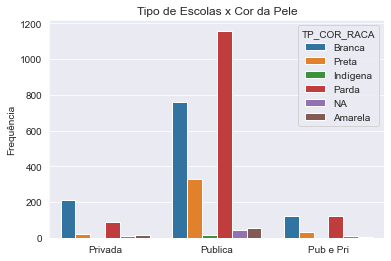

In [26]:
# Análisando tipo de escolas x cor da pele
sns.countplot(amostra.Q027, hue = amostra.TP_COR_RACA).set_title("Tipo de Escolas x Cor da Pele")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

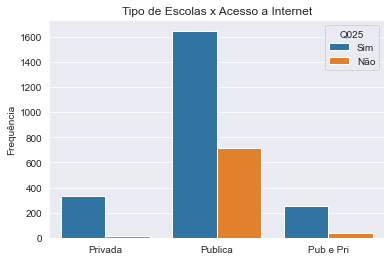

In [27]:
# Análisando tipo de escolas x acesso a internet
sns.countplot(amostra.Q027, hue = amostra.Q025).set_title("Tipo de Escolas x Acesso a Internet")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

## Análise das Variáveis Quantitativas

In [28]:
amostra.dtypes

NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                 object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
NO_MUNICIPIO_ESC            object
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
NO_MUNICIPIO_PROVA          object
SG_UF_PROVA                 object
TP_PRESENCA_CN             float64
TP_PRESENCA_CH             float64
TP_PRESENCA_LC             float64
TP_PRESENCA_MT             float64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
TP_LINGUA                    int64
TP_STATUS_REDACAO          float64
NU_NOTA_COMP1              float64
NU_NOTA_COMP2       

In [29]:
amostra.NU_IDADE

2253666    17.0
3437267    36.0
4949028    33.0
4185491    18.0
5210148    19.0
           ... 
5420422    23.0
946001     18.0
3007875    18.0
1570512    20.0
3672072    18.0
Name: NU_IDADE, Length: 2999, dtype: float64

In [30]:
amostra.NU_NOTA_MT

2253666    523.2
3437267      NaN
4949028    673.7
4185491    517.2
5210148    433.4
           ...  
5420422    604.9
946001     474.2
3007875      NaN
1570512    458.2
3672072    428.4
Name: NU_NOTA_MT, Length: 2999, dtype: float64

In [31]:
amostra.NU_NOTA_REDACAO

2253666    560.0
3437267      NaN
4949028    560.0
4185491    320.0
5210148    480.0
           ...  
5420422    700.0
946001     320.0
3007875    360.0
1570512    420.0
3672072    320.0
Name: NU_NOTA_REDACAO, Length: 2999, dtype: float64

In [32]:
# Convertendo renda mensal da familia para float
amostra['Q006'] = pd.to_numeric(amostra['Q006'], errors = 'coerce')

In [33]:
# Verificando valores nulos
amostra.isnull().sum().sort_values(ascending = False)

NO_MUNICIPIO_ESC           2181
TP_DEPENDENCIA_ADM_ESC     2181
SG_UF_ESC                  2181
TP_ENSINO                  1110
NU_NOTA_CN                  905
NU_NOTA_MT                  905
NU_NOTA_COMP5               783
NU_NOTA_COMP3               783
NU_NOTA_LC                  783
NU_NOTA_CH                  783
NU_NOTA_REDACAO             783
TP_STATUS_REDACAO           783
NU_NOTA_COMP1               783
NU_NOTA_COMP2               783
NU_NOTA_COMP4               783
TP_ESTADO_CIVIL             116
Q026                          0
Q006                          0
Q005                          0
Q025                          0
TP_LINGUA                     0
Q024                          0
Q001                          0
Q002                          0
NO_MUNICIPIO_RESIDENCIA       0
TP_PRESENCA_MT                0
SG_UF_RESIDENCIA              0
TP_PRESENCA_LC                0
TP_PRESENCA_CH                0
TP_PRESENCA_CN                0
SG_UF_PROVA                   0
NO_MUNIC

In [35]:
# Tratando valores nulos de NU_NOTA_MT, NU_NOTA_REDACAO
amostra['NU_NOTA_MT'].fillna(0, inplace = True)
amostra['NU_NOTA_REDACAO'].fillna(0, inplace = True)

### Analisando notas de redação

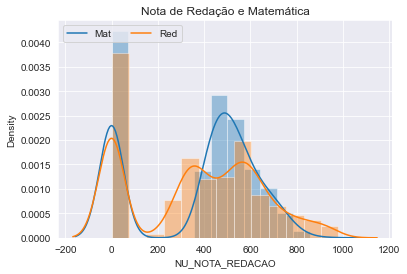

In [36]:
# Verificando distribuição de notas
sns.distplot(amostra.NU_NOTA_MT, hist = True)
sns.distplot(amostra.NU_NOTA_REDACAO, hist = True)
plt.title('Nota de Redação e Matemática')
plt.legend(labels = ['Mat','Red'], ncol = 2, loc = 'upper left')
plt.show()

In [37]:
amostra = amostra.loc[(amostra['NU_NOTA_MT'] != 0) & (amostra['NU_NOTA_REDACAO'] != 0)]

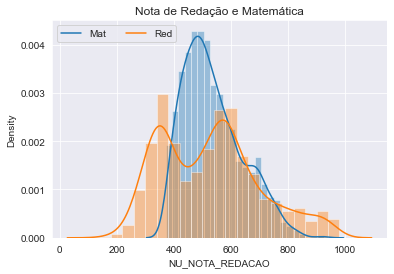

In [38]:
# Verificando distribuição de notas
sns.distplot(amostra.NU_NOTA_MT, hist = True)
sns.distplot(amostra.NU_NOTA_REDACAO, hist = True)
plt.title('Nota de Redação e Matemática')
plt.legend(labels = ['Mat','Red'], ncol = 2, loc = 'upper left')
plt.show()

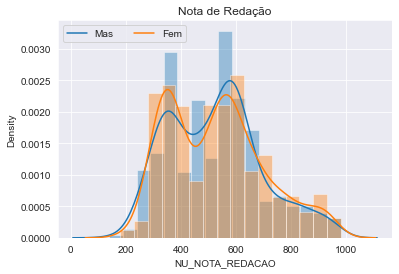

In [39]:
# Verificando distribuição de notas redação
sns.distplot(amostra.loc[amostra.TP_SEXO == 'Masculino', 'NU_NOTA_REDACAO'], hist = True)
sns.distplot(amostra.loc[amostra.TP_SEXO == 'Feminino', 'NU_NOTA_REDACAO'], hist = True)
plt.title('Nota de Redação')
plt.legend(labels = ['Mas','Fem'], ncol = 2, loc = 'upper left')
plt.show()

In [40]:
# Medidas de ?????
amostra.NU_NOTA_REDACAO.describe()

count    2037.000000
mean      525.714286
std       173.048317
min       140.000000
25%       360.000000
50%       520.000000
75%       620.000000
max       980.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [41]:
# Média de redação entre masculino e femenino
amostra.groupby('TP_SEXO').agg({'NU_NOTA_REDACAO': 'mean'})

,NU_NOTA_REDACAO
TP_SEXO,
Feminino,526.915423
Masculino,523.971119


In [42]:
# Média de redação entre masculino e femenino, por tipo de escola
amostra.groupby(['Q027', 'TP_SEXO']).agg({'NU_NOTA_REDACAO': 'mean'})

NU_NOTA_REDACAO
Q027      TP_SEXO                   
Privada   Feminino        676.875000
          Masculino       660.813008
Pub e Pri Feminino        560.869565
          Masculino       574.600000
Publica   Feminino        496.949517
          Masculino       487.960526

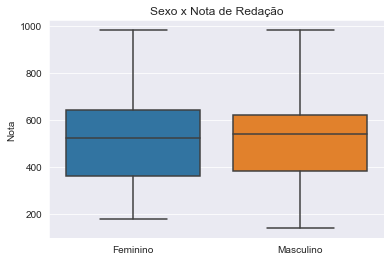

In [43]:
sns.boxplot(x = amostra.TP_SEXO, y = amostra.NU_NOTA_REDACAO, showfliers = False).set_title("Sexo x Nota de Redação")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

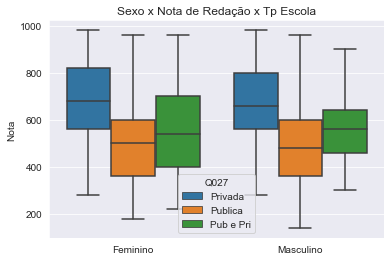

In [44]:
sns.boxplot(x = amostra.TP_SEXO, y = amostra.NU_NOTA_REDACAO, hue = amostra.Q027, showfliers = False).set_title("Sexo x Nota de Redação x Tp Escola")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

## Análisando notas de matemática

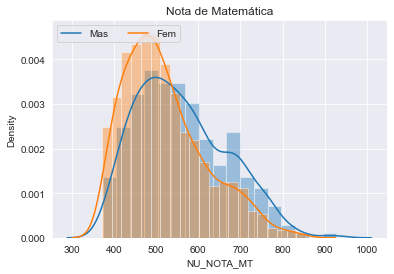

In [45]:
# Verificando distribuição de notas matemática
sns.distplot(amostra.loc[amostra.TP_SEXO == 'Masculino', 'NU_NOTA_MT'], hist = True)
sns.distplot(amostra.loc[amostra.TP_SEXO == 'Feminino', 'NU_NOTA_MT'], hist = True)
plt.title('Nota de Matemática')
plt.legend(labels = ['Mas','Fem'], ncol = 2, loc = 'upper left')
plt.show()

In [46]:
# Medidas de ?????
amostra.NU_NOTA_MT.describe()

count    2037.000000
mean      536.489642
std       103.221191
min       371.700000
25%       457.400000
50%       516.700000
75%       599.100000
max       927.100000
Name: NU_NOTA_MT, dtype: float64

In [47]:
# Média de matemática entre masculino e femenino
amostra.groupby('TP_SEXO').agg({'NU_NOTA_MT': 'mean'})

,NU_NOTA_MT
TP_SEXO,
Feminino,519.815423
Masculino,560.688327


In [48]:
# Média de matemática entre masculino e femenino, por tipo de escola
amostra.groupby(['Q027', 'TP_SEXO']).agg({'NU_NOTA_MT': 'mean'})

NU_NOTA_MT
Q027      TP_SEXO              
Privada   Feminino   603.807500
          Masculino  656.555285
Pub e Pri Feminino   538.370435
          Masculino  593.591000
Publica   Feminino   503.088722
          Masculino  535.882566

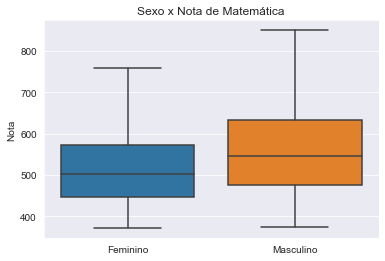

In [49]:
sns.boxplot(x = amostra.TP_SEXO, y = amostra.NU_NOTA_MT, showfliers = False).set_title("Sexo x Nota de Matemática")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

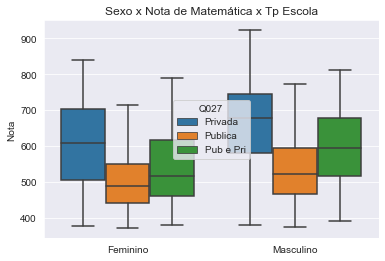

In [50]:
sns.boxplot(x = amostra.TP_SEXO, y = amostra.NU_NOTA_MT, hue = amostra.Q027, showfliers = False).set_title("Sexo x Nota de Matemática x Tp Escola")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

### Análisando renda

In [51]:
# Medidas de ?????
amostra.Q006.describe()

count     2037.000000
mean      2879.338733
std       3238.560076
min          0.000000
25%        954.000000
50%       1431.000000
75%       2862.000000
max      19081.000000
Name: Q006, dtype: float64

In [52]:
# Média de renda entre masculino e femenino, por tipo de escola
amostra.groupby(['Q027', 'TP_SEXO']).agg({'Q006': 'mean'})

Q006
Q027      TP_SEXO               
Privada   Feminino   7065.631250
          Masculino  6856.455285
Pub e Pri Feminino   3579.573913
          Masculino  3291.310000
Publica   Feminino   1933.105263
          Masculino  2221.817434

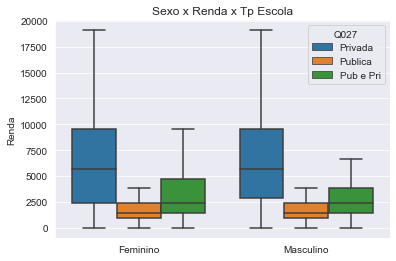

In [53]:
sns.boxplot(x = amostra.TP_SEXO, y = amostra.Q006, hue = amostra.Q027, showfliers = False).set_title("Sexo x Renda x Tp Escola")
plt.xlabel("")
plt.ylabel("Renda")
plt.show()

<AxesSubplot:>

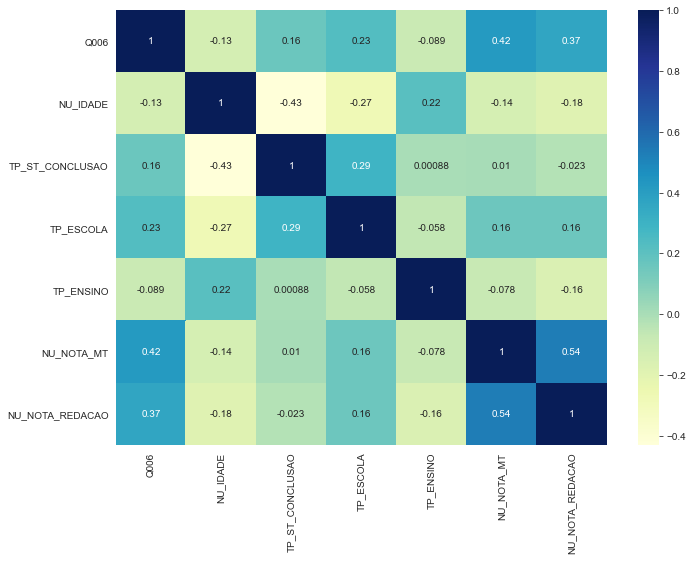

In [54]:
# Verificando a correlação de algumas variáveis quantitativas
feature = ['Q006', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
corr = amostra[feature].corr()

plt.subplots(figsize = (11, 8))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu',  annot_kws = {"size": 10})

In [55]:
# Realizando teste de Shapiro Wilk
print(stats.shapiro(amostra.loc[amostra.TP_SEXO == 'Masculino', 'NU_NOTA_MT']))
print(stats.shapiro(amostra.loc[amostra.TP_SEXO == 'Feminino', 'NU_NOTA_MT']))
print(stats.shapiro(amostra.loc[amostra.TP_SEXO == 'Masculino', 'NU_NOTA_REDACAO']))
print(stats.shapiro(amostra.loc[amostra.TP_SEXO == 'Feminino', 'NU_NOTA_REDACAO']))

ShapiroResult(statistic=0.9674578905105591, pvalue=1.1781643369235262e-12)
ShapiroResult(statistic=0.9437043070793152, pvalue=5.1559355036973626e-21)
ShapiroResult(statistic=0.9714367389678955, pvalue=1.1075674231919574e-11)
ShapiroResult(statistic=0.9594691395759583, pvalue=8.474746617014037e-18)


In [56]:
# Relizando teste de hipótese de Mann Whitney para notas de redação e matemática
stats.mannwhitneyu(
    amostra.loc[amostra.TP_SEXO == 'Masculino', 'NU_NOTA_MT'],
    amostra.loc[amostra.TP_SEXO == 'Feminino', 'NU_NOTA_MT']
)

MannwhitneyuResult(statistic=387418.5, pvalue=1.4776155544634257e-18)

In [57]:
stats.mannwhitneyu(
    amostra.loc[amostra.TP_SEXO == 'Masculino', 'NU_NOTA_REDACAO'],
    amostra.loc[amostra.TP_SEXO == 'Feminino', 'NU_NOTA_REDACAO']
)

MannwhitneyuResult(statistic=500424.0, pvalue=0.4795494865893869)